Data Fuzzy Logic Controller (FLC):
Steady State Error: 0
Peak Time: 4.8
Peak Value: 19.36
Overshoot: 9.815642458100559%
Rise Time: 3.71
Settling Time: nan

Data PID Controller:
Steady State Error: 0
Peak Time: 2.75
Peak Value: 25.51
Overshoot: -3.253533568904593%
Rise Time: 2.24
Settling Time: nan


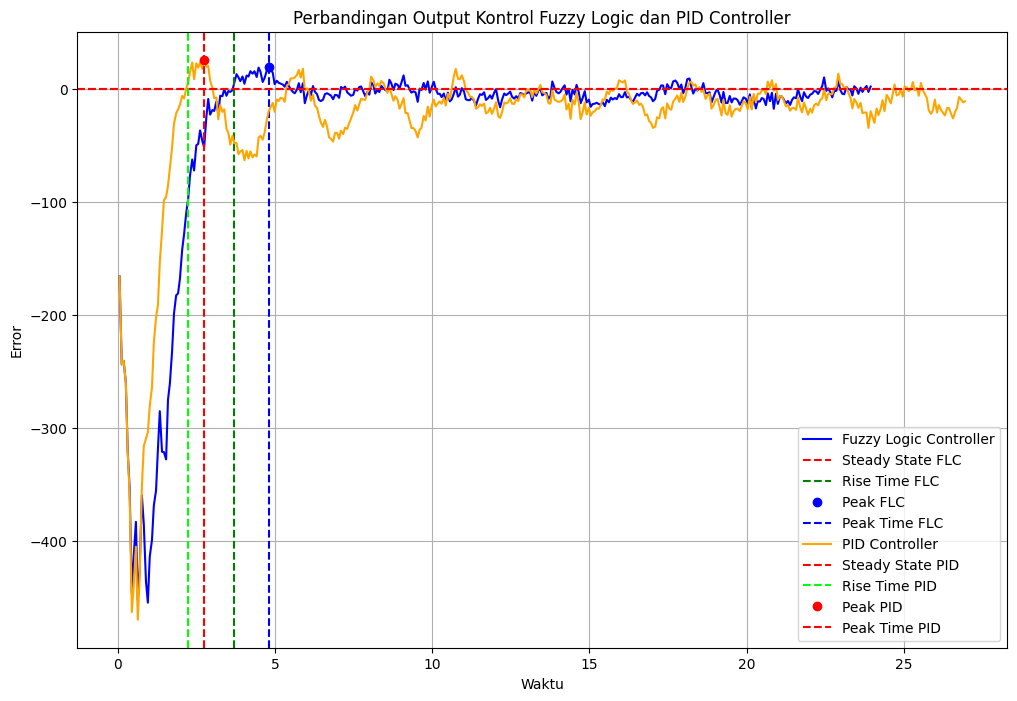

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Fungsi untuk menganalisis data
def analyze_data(file_name, steady_state_error=0):
    # Membaca data dari file CSV
    data = pd.read_csv(file_name)

    # Mengambil kolom 'error' dan 'time'
    error = data['error']
    time = data['time']

    # Peak value dan peak time
    peak_indices, _ = find_peaks(error)
    if len(peak_indices) > 0:
        peak_value = error[peak_indices].max()
        peak_index = error[peak_indices].idxmax()
        peak_time = time[peak_index]
    else:
        peak_value = np.nan
        peak_time = np.nan

    # Overshoot
    final_on_error_value = error.iloc[-1] if error.iloc[-1] != 0 else error[error.index[-2]]
    if final_on_error_value != 0:
        overshoot = ((peak_value - final_on_error_value) / final_on_error_value)
    else:
        overshoot = np.nan

    # Rise time (waktu untuk error mencapai steady state (0) pertama kali)
    try:
        zero_crossings = np.where(np.diff(np.sign(error - steady_state_error)))[0]
        rise_time_index = zero_crossings[0] + 1
        rise_time = time[rise_time_index]
    except IndexError:
        rise_time = np.nan

    # Settling time (waktu untuk error tetap berada dalam 2% dari steady state error)
    settling_threshold = 0.02 * steady_state_error
    try:
        within_settling_threshold = np.abs(error - steady_state_error) <= settling_threshold
        settling_time = time[within_settling_threshold].iloc[-1]
    except IndexError:
        settling_time = np.nan

    return time, error, steady_state_error, peak_time, peak_value, overshoot, rise_time, settling_time

# Analis data pertama
time, error, steady_state_error, peak_time, peak_value, overshoot, rise_time, settling_time = analyze_data('robot_data.csv')

# Print hasil analisis data pertama
print(f"Data Fuzzy Logic Controller (FLC):")
print(f"Steady State Error: {steady_state_error}")
print(f"Peak Time: {peak_time}")
print(f"Peak Value: {peak_value}")
print(f"Overshoot: {overshoot}%")
print(f"Rise Time: {rise_time}")
print(f"Settling Time: {settling_time}")

# Analis data kedua
time_pid, error_pid, steady_state_error_pid, peak_time_pid, peak_value_pid, overshoot_pid, rise_time_pid, settling_time_pid = analyze_data('robot_data_pid.csv')

# Print hasil analisis data kedua
print(f"\nData PID Controller:")
print(f"Steady State Error: {steady_state_error_pid}")
print(f"Peak Time: {peak_time_pid}")
print(f"Peak Value: {peak_value_pid}")
print(f"Overshoot: {overshoot_pid}%")
print(f"Rise Time: {rise_time_pid}")
print(f"Settling Time: {settling_time_pid}")

# Membuat plot
plt.figure(figsize=(12, 8))

# Plot untuk Fuzzy Logic Controller
plt.plot(time, error, label='Fuzzy Logic Controller', color='blue')
plt.axhline(y=steady_state_error, color='r', linestyle='--', label='Steady State FLC')

if not np.isnan(rise_time):
    plt.axvline(x=rise_time, color='g', linestyle='--', label='Rise Time FLC')

if not np.isnan(peak_time):
    plt.plot(peak_time, peak_value, 'bo', label='Peak FLC')
    plt.axvline(x=peak_time, color='b', linestyle='--', label='Peak Time FLC')

if not np.isnan(settling_time):
    plt.axvline(x=settling_time, color='m', linestyle='--', label='Settling Time FLC')

# Plot untuk PID Controller
plt.plot(time_pid, error_pid, label='PID Controller', color='orange')
plt.axhline(y=steady_state_error_pid, color='red', linestyle='--', label='Steady State PID')

if not np.isnan(rise_time_pid):
    plt.axvline(x=rise_time_pid, color='lime', linestyle='--', label='Rise Time PID')

if not np.isnan(peak_time_pid):
    plt.plot(peak_time_pid, peak_value_pid, 'ro', label='Peak PID')
    plt.axvline(x=peak_time_pid, color='red', linestyle='--', label='Peak Time PID')

if not np.isnan(settling_time_pid):
    plt.axvline(x=settling_time_pid, color='magenta', linestyle='--', label='Settling Time PID')

# Label dan judul
plt.xlabel('Waktu')
plt.ylabel('Error')
plt.title('Perbandingan Output Kontrol Fuzzy Logic dan PID Controller')
plt.legend()
plt.grid(True)
plt.show()


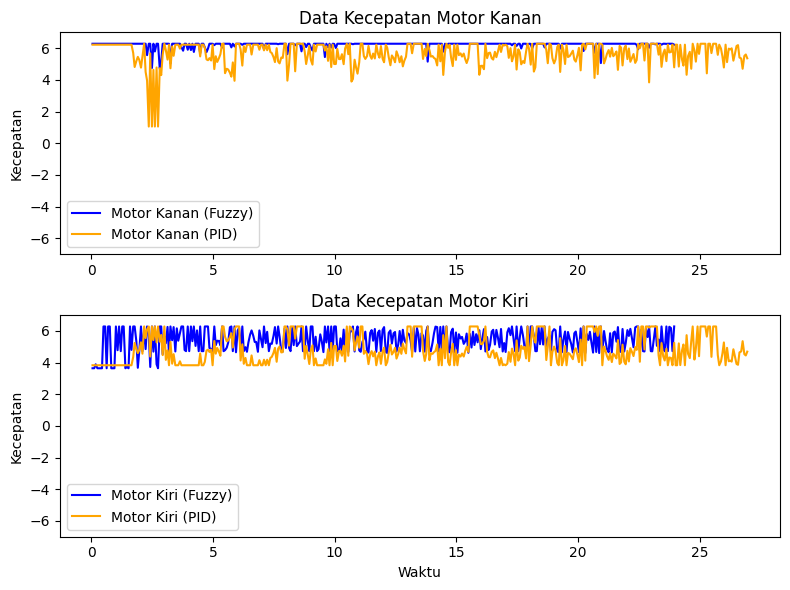

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Membaca data dari file CSV
data_fuzzy = pd.read_csv('robot_data.csv')
data_pid = pd.read_csv('robot_data_pid.csv')

# Menetapkan ukuran figure
plt.figure(figsize=(8, 6)) # Lebar 10 inci dan tinggi 10 inci

# Membuat subplot untuk motor kanan
plt.subplot(2, 1, 1) # 2 baris, 1 kolom, subplot pertama
plt.plot(data_fuzzy['time'], data_fuzzy['motor_R'], label='Motor Kanan (Fuzzy)', color='blue')
plt.plot(data_pid['time'], data_pid['motor_R'], label='Motor Kanan (PID)', color='orange')
plt.title('Data Kecepatan Motor Kanan')
plt.ylabel('Kecepatan')
plt.ylim(-7, 7) # Rentang sumbu y
plt.legend()

# Membuat subplot untuk motor kiri
plt.subplot(2, 1, 2) # 2 baris, 1 kolom, subplot kedua
plt.plot(data_fuzzy['time'], data_fuzzy['motor_L'], label='Motor Kiri (Fuzzy)', color='blue')
plt.plot(data_pid['time'], data_pid['motor_L'], label='Motor Kiri (PID)', color='orange')
plt.title('Data Kecepatan Motor Kiri')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.ylim(-7, 7) # Rentang sumbu y
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


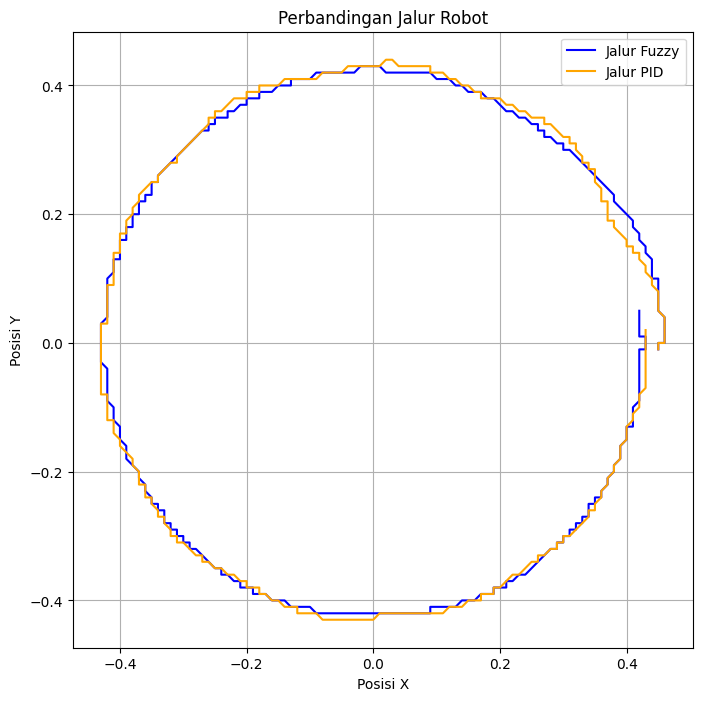

In [5]:
import csv
import matplotlib.pyplot as plt

# Fungsi untuk membaca data dari file CSV
def read_robot_data(filename):
    times = []
    errors = []
    delta_errors = []
    fuzzy_controls = []
    sensors_0 = []
    sensors_1 = []
    sensors_2 = []
    sensors_3 = []
    motors_L = []
    motors_R = []
    positions_x = []
    positions_y = []

    with open(filename, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            times.append(float(row['time']))
            errors.append(float(row['error']))
            motors_L.append(float(row['motor_L']))
            motors_R.append(float(row['motor_R']))
            positions_x.append(float(row['pos_x']))
            positions_y.append(float(row['pos_y']))

    return positions_x, positions_y

# Membaca data dari kedua file
pos_x_fuzzy, pos_y_fuzzy = read_robot_data('robot_data.csv')
pos_x_pid, pos_y_pid = read_robot_data('robot_data_pid.csv')

# Plot jalur
plt.figure(figsize=(8, 8))
plt.plot(pos_x_fuzzy, pos_y_fuzzy, linestyle='-', color='b', label='Jalur Fuzzy')
plt.plot(pos_x_pid, pos_y_pid, linestyle='-', color='orange', label='Jalur PID')
plt.xlabel('Posisi X')
plt.ylabel('Posisi Y')
plt.title('Perbandingan Jalur Robot')
plt.legend()
plt.grid(True)
plt.show()
